In [1]:
import pandas as pd
import numpy as ny
import glob
import pyarrow.parquet as pq
import datetime
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

In [2]:
#Lê dataframe criado com histórico de emprestimos
emprestimos = pd.read_csv('/Users/Clarice Nascimento/0. Alura/emprestimos.csv')
emprestimos.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema,descricao
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225,Ciências aplicadas
1,726965,L095049,2010/03/31 12:41:08.684000000,2010/03/01 12:40:56.212000000,2010/04/30 14:42:35.366000000,2.009122e+09,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225,Ciências aplicadas
2,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009,Ciências aplicadas
3,717763,L167050,NaN,2010/02/11 11:16:30.335000000,2010/03/04 08:54:32.262000000,2.008050e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009,Ciências aplicadas
4,729996,L167050,2010/03/17 09:08:26.874000000,2010/03/04 13:36:26.599000000,2010/03/31 18:04:29.669000000,2.007226e+08,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009,Ciências aplicadas


In [3]:
emprestimos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072522 entries, 0 to 2072521
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id_emprestimo         int64  
 1   codigo_barras         object 
 2   data_renovacao        object 
 3   data_emprestimo       object 
 4   data_devolucao        object 
 5   matricula_ou_siape    float64
 6   tipo_vinculo_usuario  object 
 7   id_exemplar           int64  
 8   colecao               object 
 9   biblioteca            object 
 10  status_material       object 
 11  localizacao           int64  
 12  registro_sistema      int64  
 13  descricao             object 
dtypes: float64(1), int64(4), object(9)
memory usage: 221.4+ MB


In [4]:
#Transformando coluna de data de emprestimo para formato de datetime do pandas
emprestimos['data_emprestimo'] = pd.to_datetime(emprestimos['data_emprestimo'])   #,format='%Y-%m-%d')
emprestimos['data_emprestimo']

0         2010-01-04 07:44:10.721
1         2010-03-01 12:40:56.212
2         2010-01-04 07:44:10.750
3         2010-02-11 11:16:30.335
4         2010-03-04 13:36:26.599
                    ...          
2072517   2020-03-17 19:49:10.187
2072518   2020-03-17 19:51:15.700
2072519   2020-03-17 20:00:11.416
2072520   2020-03-17 20:47:18.741
2072521   2020-03-17 21:22:22.138
Name: data_emprestimo, Length: 2072522, dtype: datetime64[ns]

In [5]:
#Extraindo informação de ano da coluna de data de emprestimo e alocando em uma nova coluna 
emprestimos['ano'] = emprestimos['data_emprestimo'].dt.year
emprestimos['ano']

0          2010
1          2010
2          2010
3          2010
4          2010
           ... 
2072517    2020
2072518    2020
2072519    2020
2072520    2020
2072521    2020
Name: ano, Length: 2072522, dtype: int32

In [6]:
emprestimos.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema,descricao,ano
0,709684,L095049,NaN,2010-01-04 07:44:10.721,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225,Ciências aplicadas,2010
1,726965,L095049,2010/03/31 12:41:08.684000000,2010-03-01 12:40:56.212,2010/04/30 14:42:35.366000000,2.009122e+09,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225,Ciências aplicadas,2010
2,709685,L167050,NaN,2010-01-04 07:44:10.750,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009,Ciências aplicadas,2010
3,717763,L167050,NaN,2010-02-11 11:16:30.335,2010/03/04 08:54:32.262000000,2.008050e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009,Ciências aplicadas,2010
4,729996,L167050,2010/03/17 09:08:26.874000000,2010-03-04 13:36:26.599,2010/03/31 18:04:29.669000000,2.007226e+08,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009,Ciências aplicadas,2010


In [7]:
#Realizando contagem de quantidade de emprestimos feitas em cada ano e alocando em um novo dataframe
total_emprestimos = emprestimos.groupby('ano')['id_exemplar'].count().reset_index(name='total_emprestimos')
total_emprestimos

,ano,total_emprestimos
0,2010,161394
1,2011,196390
2,2012,221365
3,2013,234749
4,2014,219189
5,2015,213582
6,2016,215900
7,2017,218462
8,2018,194080
9,2019,171801


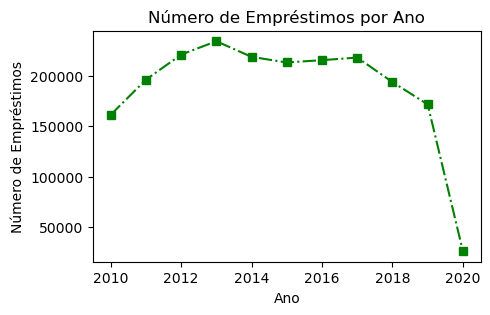

In [8]:
#Plotando o gráfico de linhas para total de emprestimos por ano
plt.figure(figsize=(5, 3))
#plt.plot(x, y, **kwargs)
#plt.plot(total_emprestimos['ano'], total_emprestimos['total_emprestimos'], marker='o') #marquer 'o' para ser as bolinhas
plt.plot(total_emprestimos['ano'], total_emprestimos['total_emprestimos'], color='green', linestyle='-.', marker='s')

#Adicionando títulos e rótulos
plt.title('Número de Empréstimos por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Empréstimos')
#plt.grid(True)
plt.show()

Com as informações geradas, vemos que a partir de 2013 tivemos quedas recorrentes em relação a quantidade de exemplares emprestados pelas bibliotecas, se acentuando nos ultimos dois anos, provavelmente atrelado ao período da quantidade de dados que temos em 2020.
Importante levar a investigações para mapear comportamento dos usuários e identificar as ações que foram realizadas entre 2010 e 2012, que resultaram em crescimento dos emprestimos de exemplares e assim verificando se os mesmos podem ser replicados futuramente. 

In [10]:
#Extraindo informação de mês da coluna de data de emprestimo e alocando em uma nova coluna 
emprestimos['mes'] = emprestimos['data_emprestimo'].dt.month
emprestimos['mes']

0          1
1          3
2          1
3          2
4          3
          ..
2072517    3
2072518    3
2072519    3
2072520    3
2072521    3
Name: mes, Length: 2072522, dtype: int32

In [11]:
emprestimos

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema,descricao,ano,mes
0,709684,L095049,NaN,2010-01-04 07:44:10.721,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225,Ciências aplicadas,2010,1
1,726965,L095049,2010/03/31 12:41:08.684000000,2010-03-01 12:40:56.212,2010/04/30 14:42:35.366000000,2.009122e+09,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225,Ciências aplicadas,2010,3
2,709685,L167050,NaN,2010-01-04 07:44:10.750,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009,Ciências aplicadas,2010,1
3,717763,L167050,NaN,2010-02-11 11:16:30.335,2010/03/04 08:54:32.262000000,2.008050e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009,Ciências aplicadas,2010,2
4,729996,L167050,2010/03/17 09:08:26.874000000,2010-03-04 13:36:26.599,2010/03/31 18:04:29.669000000,2.007226e+08,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009,Ciências aplicadas,2010,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072517,2989018,2009036492,NaN,2020-03-17 19:49:10.187,2020/12/03 08:12:20.000000000,2.015011e+10,ALUNO DE GRADUAÇÃO,274820,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,676,120845,Ciências aplicadas,2020,3
2072518,2989020,2014062640,NaN,2020-03-17 19:51:15.700,2021/01/07 11:16:28.000000000,2.019004e+10,ALUNO DE GRADUAÇÃO,1157915,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,228,213248,Religião,2020,3
2072519,2989032,2018003324,NaN,2020-03-17 20:00:11.416,2021/08/30 13:29:44.000000000,2.019102e+10,ALUNO DE PÓS-GRADUAÇÃO,1317173,Acervo Circulante,Biblioteca Setorial da Faculdade de Ciências d...,REGULAR,784,255835,Belas artes,2020,3
2072520,2989049,2006024313,NaN,2020-03-17 20:47:18.741,NaN,2.015013e+10,ALUNO DE GRADUAÇÃO,206073,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,663,82178,Ciências aplicadas,2020,3


In [12]:
#Realizando contagem de quantidade de emprestimos feitas em cada mês e alocando em um novo dataframe
total_emprestimos_mes = emprestimos.groupby('mes')['id_exemplar'].count().reset_index(name='total_emprestimos')
total_emprestimos_mes

,mes,total_emprestimos
0,1,67514
1,2,210200
2,3,252185
3,4,208725
4,5,202530
5,6,138123
6,7,123790
7,8,232793
8,9,208234
9,10,188410


In [13]:
#Criando dicionário de meses do ano
dicionario_meses = {1:'Jan',2:'Fev',3:'Mar',4:'Abr',
                    5:'Mai',6:'Jun',7:'Jul',8:'Ago',
                    9:'Set',10:'Out',11:'Nov',12:'Dez'}

In [14]:
#Alterando a referência de mês de acordo com a correspondencia no dicionário
total_emprestimos_mes.mes = total_emprestimos_mes.mes.map(dicionario_meses)
total_emprestimos_mes

,mes,total_emprestimos
0,Jan,67514
1,Fev,210200
2,Mar,252185
3,Abr,208725
4,Mai,202530
5,Jun,138123
6,Jul,123790
7,Ago,232793
8,Set,208234
9,Out,188410


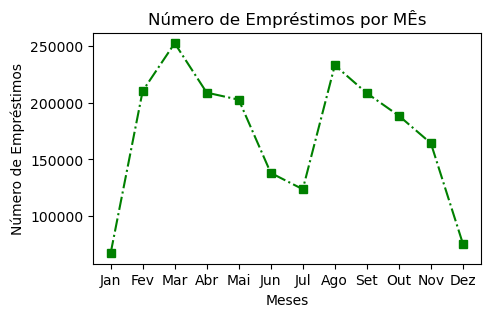

In [15]:
# Plotando o gráfico de linhas para total de emprestimos por mês
plt.figure(figsize=(5, 3))
#plt.plot(x, y, **kwargs)
#plt.plot(total_emprestimos['ano'], total_emprestimos['total_emprestimos'], marker='o') #marquer 'o' para ser as bolinhas
plt.plot(total_emprestimos_mes['mes'], total_emprestimos_mes['total_emprestimos'], color='green', linestyle='-.', marker='s')

#Adicionando títulos e rótulos
plt.title('Número de Empréstimos por Mês')
plt.xlabel('Meses')
plt.ylabel('Número de Empréstimos')
#plt.grid(True)
plt.show()

De acordo com as informações, vemos que os meses de maior pico de registros de emprestimos são em março e agosto, o que refuta a suspeita da direção de que os meses com maior número de exemplares emprestados sejam março e setembro. Com isso, a programação de férias dos colaboradores de acordo com os meses de menor demanda seriam entre junho, julho, dezembro e janeiro, coincidindo com o período de ferias da universidade.

In [16]:
#Extraindo informação de horarios da coluna de data de emprestimo e alocando em uma nova coluna 
emprestimos['horario'] = emprestimos['data_emprestimo'].dt.hour
emprestimos['horario']

0           7
1          12
2           7
3          11
4          13
           ..
2072517    19
2072518    19
2072519    20
2072520    20
2072521    21
Name: horario, Length: 2072522, dtype: int32

In [17]:
#Realizando contagem de quantidade de emprestimos feitas em cada horario e alocando em um novo dataframe
total_emprestimos_horario = emprestimos.groupby('horario')['id_exemplar'].count().reset_index(name='total_emprestimos_hora')
total_emprestimos_horario

,horario,total_emprestimos_hora
0,0,17
1,6,14
2,7,18777
3,8,103416
4,9,131273
5,10,185839
6,11,180048
7,12,148754
8,13,126987
9,14,150876


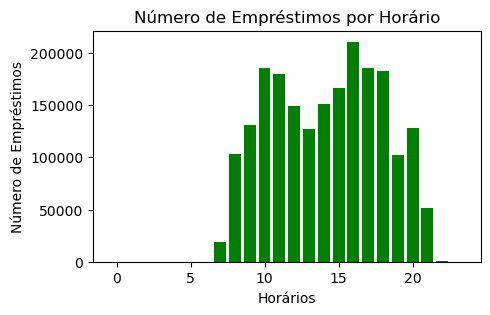

In [18]:
#Plotando o gráfico de barras para total de emprestimos por horario
plt.figure(figsize=(5, 3))
#plt.plot(x, y, **kwargs)
#plt.plot(total_emprestimos['ano'], total_emprestimos['total_emprestimos'], marker='o') #marquer 'o' para ser as bolinhas
plt.bar(total_emprestimos_horario['horario'], total_emprestimos_horario['total_emprestimos_hora'], color='green')

#Adicionando títulos e rótulos
plt.title('Número de Empréstimos por Horário')
plt.xlabel('Horários')
plt.ylabel('Número de Empréstimos')
#plt.grid(True)
plt.show()

Para uma programação diária das atividades dos colaboradores mais assertiva, poderiam se alocar então entre os horarios das 7h as 9h e também as 19h